In [25]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

In [26]:
# import CSV data file and create a dataframe from that CSV
vax_df = pd.read_csv("../vax_rates.csv")
vax_df.head(5)

,Date,State,Total Cases,Confirmed New C19 Case,Total Death,Confirmed New C19 Death,New Persons Vaccinated,Cumulative Persons Vaccinated,New Persons Fully Vaccinated,Cumulative Persons Fully Vaccinated,New Vaccines Doses Admined,Cumulative Vaccines Doses Admined
0,2020-10-01,NY,"215,457",849,"9,046",5,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-02,NY,"216,456",999,"9,050",4,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-03,NY,"217,475","1,019","9,057",7,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-04,NY,"218,165",690,"9,068",11,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-05,NY,"218,630",465,"9,073",5,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Filter the data pertaining to year 2021 since vaccination details are available for that period 
vax_df = pd.DataFrame(vax_df.loc[(vax_df['Date'] >= '2021-01-01') & (vax_df['Date'] <'2022-01-01'), :])
vax_df

,Date,State,Total Cases,Confirmed New C19 Case,Total Death,Confirmed New C19 Death,New Persons Vaccinated,Cumulative Persons Vaccinated,New Persons Fully Vaccinated,Cumulative Persons Fully Vaccinated,New Vaccines Doses Admined,Cumulative Vaccines Doses Admined
92,2021-01-01,NY,"559,358","11,204","12,701",135,NaN,NaN,NaN,NaN,NaN,NaN
93,2021-01-02,NY,"569,204","9,846","12,798",97,NaN,NaN,NaN,NaN,NaN,NaN
94,2021-01-03,NY,"577,232","8,028","12,912",114,NaN,NaN,NaN,NaN,NaN,NaN
95,2021-01-04,NY,"584,715","7,483","13,039",127,NaN,NaN,NaN,NaN,NaN,NaN
96,2021-01-05,NY,"592,518","7,803","13,163",124,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
909,2021-12-27,TX,"4,516,356","17,331","74,262",170,60469.0,19282639.0,39565.0,16462911.0,256062.0,40274677.0
910,2021-12-28,TX,"4,531,151","14,795","74,330",68,21531.0,19304170.0,14283.0,16477194.0,80208.0,40354885.0
911,2021-12-29,TX,"4,545,437","14,286","74,401",71,32800.0,19336970.0,20321.0,16497515.0,128149.0,40483034.0
912,2021-12-30,TX,"4,561,037","15,600","74,491",90,35165.0,19372135.0,19848.0,16517363.0,129039.0,40612073.0


In [28]:
# finding the datatypes of the columns in vaccination dataframe
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 92 to 913
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 730 non-null    object 
 1   State                                730 non-null    object 
 2   Total Cases                          730 non-null    object 
 3   Confirmed New C19 Case               730 non-null    object 
 4   Total Death                          730 non-null    object 
 5   Confirmed New C19 Death              730 non-null    int64  
 6   New Persons Vaccinated               697 non-null    float64
 7   Cumulative Persons Vaccinated        700 non-null    float64
 8   New Persons Fully Vaccinated         696 non-null    float64
 9   Cumulative Persons Fully Vaccinated  696 non-null    float64
 10  New Vaccines Doses Admined           700 non-null    float64
 11  Cumulative Vaccines Doses Admin

In [31]:
# Extracting the first seven characters of date column to find the month of the column
vax_df["new_date"] = vax_df["Date"].str[:7]
vax_df.head()

,Date,State,Total Cases,Confirmed New C19 Case,Total Death,Confirmed New C19 Death,New Persons Vaccinated,Cumulative Persons Vaccinated,New Persons Fully Vaccinated,Cumulative Persons Fully Vaccinated,New Vaccines Doses Admined,Cumulative Vaccines Doses Admined,new_date
92,2021-01-01,NY,"559,358","11,204","12,701",135,NaN,NaN,NaN,NaN,NaN,NaN,2021-01
93,2021-01-02,NY,"569,204","9,846","12,798",97,NaN,NaN,NaN,NaN,NaN,NaN,2021-01
94,2021-01-03,NY,"577,232","8,028","12,912",114,NaN,NaN,NaN,NaN,NaN,NaN,2021-01
95,2021-01-04,NY,"584,715","7,483","13,039",127,NaN,NaN,NaN,NaN,NaN,NaN,2021-01
96,2021-01-05,NY,"592,518","7,803","13,163",124,NaN,NaN,NaN,NaN,NaN,NaN,2021-01


In [6]:
# creating new dataframe with required columns to do STATISTICAL work 
cols_to_keep = ['Date',
                'new_date',
                 'State',
                 'Confirmed New C19 Case',
                 'Confirmed New C19 Death',
                 'New Persons Vaccinated',
                 'New Persons Fully Vaccinated',
                 'New Vaccines Doses Admined'
               ]
vax_agg_df = vax_df.loc[:, cols_to_keep]
                     
vax_agg_df


,Date,new_date,State,Confirmed New C19 Case,Confirmed New C19 Death,New Persons Vaccinated,New Persons Fully Vaccinated,New Vaccines Doses Admined
92,2021-01-01,2021-01,NY,"11,204",135,NaN,NaN,NaN
93,2021-01-02,2021-01,NY,"9,846",97,NaN,NaN,NaN
94,2021-01-03,2021-01,NY,"8,028",114,NaN,NaN,NaN
95,2021-01-04,2021-01,NY,"7,483",127,NaN,NaN,NaN
96,2021-01-05,2021-01,NY,"7,803",124,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
909,2021-12-27,2021-12,TX,"17,331",170,60469.0,39565.0,256062.0
910,2021-12-28,2021-12,TX,"14,795",68,21531.0,14283.0,80208.0
911,2021-12-29,2021-12,TX,"14,286",71,32800.0,20321.0,128149.0
912,2021-12-30,2021-12,TX,"15,600",90,35165.0,19848.0,129039.0


In [7]:
# grouping the dataframe by new_date and state columns
vax_df_grp = vax_agg_df.groupby(['new_date','State']).sum().reset_index()
vax_df_grp

,new_date,State,Confirmed New C19 Death,New Persons Vaccinated,New Persons Fully Vaccinated,New Vaccines Doses Admined
0,2021-01,NY,3654,930600.0,293373.0,1295930.0
1,2021-01,TX,9907,1119079.0,377495.0,1497418.0
2,2021-02,NY,1783,1217708.0,1100493.0,2349788.0
3,2021-02,TX,5213,1573830.0,1325306.0,3157733.0
4,2021-03,NY,781,3360275.0,1855314.0,5036725.0
5,2021-03,TX,2322,3943770.0,2168975.0,6037476.0
6,2021-04,NY,625,3207055.0,3435706.0,6374634.0
7,2021-04,TX,1221,3615619.0,3852916.0,7281583.0
8,2021-05,NY,371,1568849.0,2369838.0,3968931.0
9,2021-05,TX,983,1712401.0,2446317.0,4056464.0


In [8]:
# converting the new_date column values from extracted string to 3 or 4 lettered month names
mth = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
vax_df_grp["new_date"] = vax_df_grp["new_date"].apply(lambda x: mth[int(x[5:7])])
vax_df_grp


,new_date,State,Confirmed New C19 Death,New Persons Vaccinated,New Persons Fully Vaccinated,New Vaccines Doses Admined
0,Jan,NY,3654,930600.0,293373.0,1295930.0
1,Jan,TX,9907,1119079.0,377495.0,1497418.0
2,Feb,NY,1783,1217708.0,1100493.0,2349788.0
3,Feb,TX,5213,1573830.0,1325306.0,3157733.0
4,Mar,NY,781,3360275.0,1855314.0,5036725.0
5,Mar,TX,2322,3943770.0,2168975.0,6037476.0
6,Apr,NY,625,3207055.0,3435706.0,6374634.0
7,Apr,TX,1221,3615619.0,3852916.0,7281583.0
8,May,NY,371,1568849.0,2369838.0,3968931.0
9,May,TX,983,1712401.0,2446317.0,4056464.0


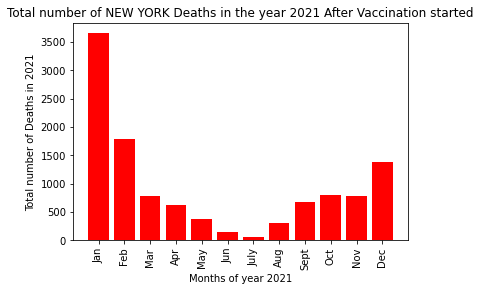

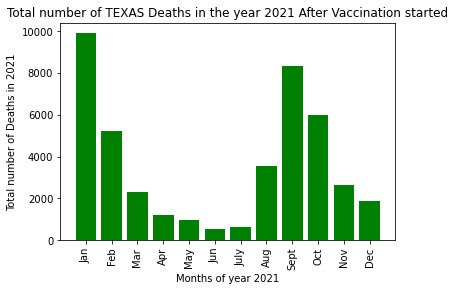

In [9]:
# creating the x axis and y axis values for plotting bargraph seperately for NEW YORK and TEXAS
x_axis = vax_df_grp.new_date.unique()
x_axis
y_axis_1 = vax_df_grp.loc[vax_df_grp['State']=='NY','Confirmed New C19 Death'].values
y_axis_2 = vax_df_grp.loc[vax_df_grp['State']=='TX','Confirmed New C19 Death'].values
y_axis_vac_1 = vax_df_grp.loc[vax_df_grp['State']=='NY','New Vaccines Doses Admined'].values
y_axis_vac_2 = vax_df_grp.loc[vax_df_grp['State']=='TX','New Vaccines Doses Admined'].values

# plotting the NEW YORK covid deaths for 2021 year
plt.bar(x_axis, y_axis_1, color='red', align='center' )
plt.title("Total number of NEW YORK Deaths in the year 2021 After Vaccination started")
plt.xlabel("Months of year 2021")
plt.ylabel("Total number of Deaths in 2021")
plt.xticks(rotation="vertical")
plt.show()

# plotting the TEXAS covid deaths for 2021 year
plt.bar(x_axis, y_axis_2, color='green', align='center') 
plt.title("Total number of TEXAS Deaths in the year 2021 After Vaccination started")
plt.xlabel("Months of year 2021")
plt.ylabel("Total number of Deaths in 2021")
plt.xticks(rotation="vertical")
plt.show()

<h1> Analysis of the above Barchart of COVID Deaths for NEW YORK and TEXAS </h1>
<h2> NEW YORK </h2>
<ul> In the month of Jan the deaths because of COVID was higher </ul>
<ul> As people started getting vaccinations in Jan 2021 the COVID deaths, started coming down slowly and It was almost reduced to zero in the month of July </ul>
<ul> But COVID deaths started increasing slowly and almost reached above Thousands in December </ul>


<h2> TEXAS </h2>
<ul> In the month of Jan the deaths because of COVID was higher </ul>
<ul> As people started getting vaccinations in Jan 2021 the COVID deaths, started coming down slowly and It was almost reduced to close to zero in the month of June </ul>
<ul> But COVID deaths started increasing slowly and almost reached above 8 Thousands in September </ul>
<ul> Then again it started to drop in Texas and reached below 2000 in December </ul>

<ul> Finally the COVID Deaths in both states, NEW YORK and TEXAS, The death rate match in end of year 2021 </ul>
    

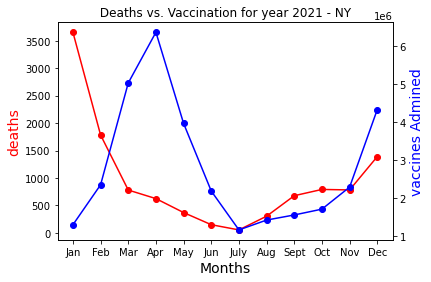

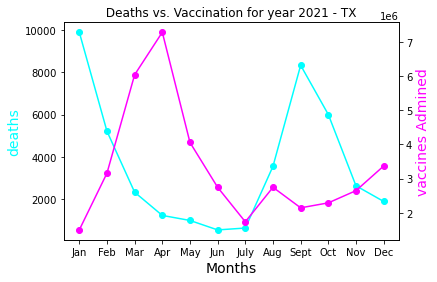

In [10]:
# For NEW YORK
# creating a line graph to show the variation of covid deaths as people get vaccinated change in the year 2021
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(x_axis,y_axis_1,color="red", marker="o")
# set x-axis label
ax.set_xlabel("Months", fontsize = 14)
# set y-axis label
ax.set_ylabel("deaths",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y_axis_vac_1,color="blue",marker="o")
ax2.set_ylabel("vaccines Admined",color="blue",fontsize=14)
plt.title(" Deaths vs. Vaccination for year 2021 - NY ")
plt.show()

#  FOR TEXAS
# creating a line graph to show the variation of covid deaths as people get vaccinated change in the year 2021
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(x_axis,y_axis_2,color="cyan", marker="o")
# set x-axis label
ax.set_xlabel("Months", fontsize = 14)
# set y-axis label
ax.set_ylabel("deaths",color="cyan",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y_axis_vac_2,color="fuchsia",marker="o")
ax2.set_ylabel("vaccines Admined",color="fuchsia",fontsize=14)
plt.title(" Deaths vs. Vaccination for year 2021 - TX ")
plt.show()


<h1> Analysis of the above Linechart of COVID Deaths and Vaccination for NEW YORK and TEXAS </h1>
<h2> NEW YORK </h2>
<ul> In the month of Jan the deaths because of COVID was higher </ul>
<ul> As people started getting vaccinations in Jan 2021 the COVID deaths, started coming down slowly and It was almost reduced to zero in the month of July </ul>
<ul> But COVID deaths started increasing slowly and almost reached above Thousands in December </ul>


<h2> TEXAS </h2>
<ul> In the month of Jan the deaths because of COVID was higher </ul>
<ul> As people started getting vaccinations in Jan 2021 the COVID deaths, started coming down slowly and It was almost reduced to close to zero in the month of June </ul>
<ul> But COVID deaths started increasing slowly and almost reached above 8 Thousands in September </ul>
<ul> Then again it started to drop in Texas and reached below 2000 in December </ul>

<ul> Finally the COVID Deaths in both states, NEW YORK and TEXAS, The death rate matched in end of year 2021 </ul>

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the COVID Deaths

# Using the aggregation method, produce the same summary statistics in a single line

dea_aggr = vax_df_grp.groupby("State")["Confirmed New C19 Death"].agg(['mean','median','var','std','sem'])
pr_vacc_aggr = vax_df_grp.groupby("State")["New Persons Fully Vaccinated"].agg(['mean','median','var','std','sem'])
vac_dose_aggr = vax_df_grp.groupby("State")["New Vaccines Doses Admined"].agg(['mean','median','var','std','sem'])

print("Aggregates of covid deaths")
print(dea_aggr)
print("Aggregates of New Persons Fully Vaccinated")
print(pr_vacc_aggr)
print("Aggregates of New Vaccines Doses Admined")
print(vac_dose_aggr)

Aggregates of covid deaths
          mean  median           var          std         sem
State                                                        
NY      947.25   729.5  9.683935e+05   984.069854  284.076498
TX     3600.75  2474.0  9.721950e+06  3118.004144  900.090266
Aggregates of New Persons Fully Vaccinated
               mean     median           var           std            sem
State                                                                    
NY     1.160447e+06   671098.5  9.154412e+11  9.567869e+05  276200.586977
TX     1.368004e+06  1050341.0  1.051588e+12  1.025470e+06  296027.564836
Aggregates of New Vaccines Doses Admined
               mean     median           var           std            sem
State                                                                    
NY     2.806415e+06  2237044.5  2.904234e+12  1.704181e+06  491954.804535
TX     3.308384e+06  2744466.5  3.004143e+12  1.733246e+06  500345.166000


In [12]:
# Put states into a list
states = ["NY", "TX"]

# Create empty list to store COVID death cases
covid_dea = []

for state in states:
    st_box_df = vax_df_grp.loc[vax_df_grp["State"] == state]
    covid_dea.append(st_box_df["Confirmed New C19 Death"])
    
covid_dea

[0     3654
 2     1783
 4      781
 6      625
 8      371
 10     150
 12      55
 14     305
 16     678
 18     792
 20     783
 22    1390
 Name: Confirmed New C19 Death, dtype: int64,
 1     9907
 3     5213
 5     2322
 7     1221
 9      983
 11     534
 13     623
 15    3550
 17    8341
 19    6005
 21    2626
 23    1884
 Name: Confirmed New C19 Death, dtype: int64]

In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile0 = covid_dea[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = covid_dea[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

#Print values 
print(f"For {states[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {states[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")


For NY values below -526.0 and above 1822.0 could be outliers
For TX values below -5212.75 and above 11785.25 could be outliers


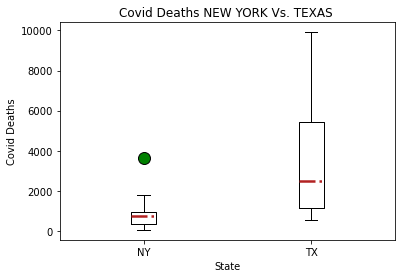

In [14]:
# Generate a box plot of the final Covid Deaths variation between NEW YORK and  TEXAS for year 2021
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
fig1, ax1 = plt.subplots()
ax1.set_title('Covid Deaths NEW YORK Vs. TEXAS ')
ax1.set_ylabel('Covid Deaths')
ax1.set_xlabel("State")
ax1.boxplot(covid_dea, flierprops = flierprops, medianprops=medianprops, labels = states)
plt.show()

<h1> Analysis of COVID deaths variation between NEW YORK and TEXAS </h1>
<ul> New york state has an outlier value so visibly. </ul>
<ul> Both the values for NEW YORK and TEXAS, of COVID Deaths are Positively Skewed datas </ul>

<ul>    Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers. </ul>
<ul>  
Image result</ul>
<ul>
Positively Skewed : For a distribution that is positively skewed, the box plot will show the median closer to the lower or bottom quartile. A distribution is considered "Positively Skewed" when mean > median. It means the data constitute higher frequency of high valued scores </ul>

<h1 style="color:green"> Conclusion - Vaccination Administration impact the rate or volume of COVID cases </h1>
<ul style="color:red"> According to the LineChart titled "Deaths vs. Vaccination for year 2021", we can deduct that the number of COVID deaths reduced drastically as the number of people vaccinated increased between the months from January to April, 2021. </ul>
<ul style="color:red"> This supports our Alternate Hypothesis - The rate of vaccine administration has an effect on the volume of COVID-19 cases.</ul>

<ul style="color:saddlebrown"> In contrast to the above conclusion the data also supports our Null Hypothesis after April till December 2021. </ul>
<ul style="color:saddlebrown"> As seen in the Boxchart titled - "Covid Deaths NEW YORK Vs. TEXAS", the overall data is positively skewed. </ul>
<ul style="color:saddlebrown"> From April till July 2021, the number of deaths kept reducing inspite of reduction in number of people getting vaccinated.</ul>
<ul style="color:saddlebrown"> The total opposite happens after July, wherein the number of deaths kept increasing even though number of people getting vaccinated increased.</ul>
<ul style="color:saddlebrown"> The above 2 observations suggest that the NULL HYPOTHESIS - The rate of vaccine administration has no effect on the volume of COVID-19 cases - holds true.</ul>
